[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W12/Practice1.ipynb)

In [1]:
import pandas as pd
import os

In [2]:
def download_ts():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W12/data_german.csv"
  res = requests.get(url, allow_redirects=True)
  with open('data_german.csv','wb') as file:
    file.write(res.content)
  print("Dataset downloaded!, the name of the time series is : data_german.csv (this data is all about electricity load nothing special)")
download_ts()

Dataset downloaded!, the name of the time series is : data_german.csv (this data is all about electricity load nothing special)


In [4]:
os.listdir()

['.config', 'data_german.csv', 'sample_data']

In [13]:
data = pd.read_csv("data_german.csv").iloc[:5000,-1]
train = data[:4000]
test = data[4000:]

In [15]:
from matplotlib import pyplot as plt

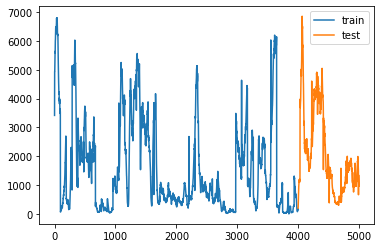

In [17]:
plt.plot(train, label = "train")
plt.plot(test,  label = "test")
plt.legend()
plt.show()

In [26]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

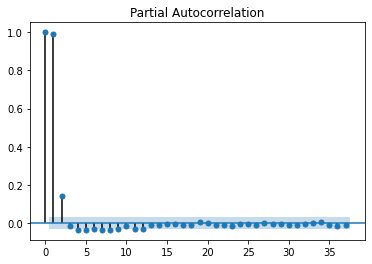

In [30]:
plot_pacf(train);

In [33]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [34]:
arma_order_select_ic(train, max_ar = 7, max_ma = 2, ic = ["aic", "bic"])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-para

{'aic':               0             1             2
 0  70247.960008  65628.572537  62596.775843
 1  54989.208585  54899.216945  54894.133989
 2  54894.414688  54896.239820  54880.431529
 3  54896.164368  54866.778149  54864.696900
 4  54893.406172  54865.025478  54866.675403
 5  54890.356974  54866.726704  54868.772123
 6  54888.337816  54868.808044  54870.654601
 7  54885.581837  54870.711938  54872.561267,
 'bic':               0             1             2
 0  70260.548107  65647.454686  62621.952042
 1  55008.090734  54924.393143  54925.604237
 2  54919.590886  54927.710068  54918.195827
 3  54927.634616  54904.542447  54908.755247
 4  54931.170470  54909.083825  54917.027801
 5  54934.415321  54917.079101  54925.418569
 6  54938.690213  54925.454491  54933.595097
 7  54942.228283  54933.652434  54941.795813,
 'aic_min_order': (3, 2),
 'bic_min_order': (3, 1)}

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [77]:
mod_train = ARIMA(train, order = (2,0,2))
model_train = mod.fit()

In [78]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     MW   No. Observations:                 4000
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -27425.351
Date:                Fri, 16 Dec 2022   AIC                          54862.702
Time:                        16:02:18   BIC                          54900.466
Sample:                             0   HQIC                         54876.088
                               - 4000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1575.8433    370.473      4.254      0.000     849.729    2301.958
ar.L1          1.9337      0.022     86.175      0.000       1.890       1.978
ar.L2         -0.9348      0.022    -42.213      0.000      -0.978      -0.891
ma.L1         -1.1051      0.023    -48.874      0.000      -1.149      -1.061
ma.L2          0.1843      0.006     28.966      0.000       0.172       0.197
sigma2      5.278e+04    222.686    237.008      0.000    5.23e+04    5.32e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           5022474.92
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                       176.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

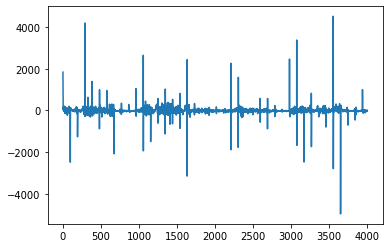

In [79]:
plt.plot(model_train.resid)

In [53]:
from statsmodels.stats.diagnostic import acorr_ljungbox


In [80]:
acorr_ljungbox(model_train.resid, return_df = True, model_df = 4)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.590206,NaN
2,0.664105,NaN
3,0.679591,NaN
4,0.711324,NaN
5,0.717978,0.396808
6,0.821805,0.663052
7,0.930862,0.817974
8,0.987156,0.911737
9,1.079170,0.955931
10,1.713358,0.944085


In [73]:
params_train = model.params
print(params_train)

const      1575.843325
ar.L1         1.933701
ar.L2        -0.934849
ma.L1        -1.105094
ma.L2         0.184301
sigma2    52778.271494
dtype: float64


In [85]:
mod_test = ARIMA(test, order = (2,0,2))
model_test = mod_test.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [86]:
model_test.params = model_train.params

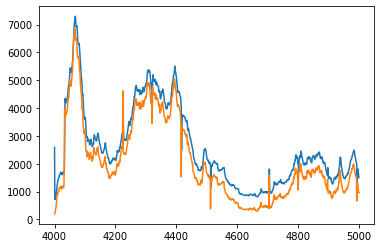

In [91]:
plt.plot(model_test.predict()+500)
plt.plot(test)

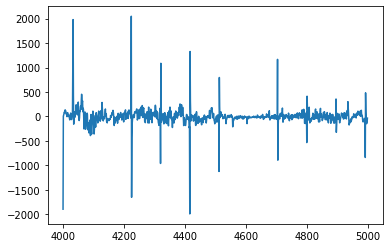

In [93]:
plt.plot(model_test.resid)

In [97]:
acorr_ljungbox(model_test.resid, model_df = 4, return_df = True)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.096818,NaN
2,0.450482,NaN
3,3.166648,NaN
4,6.303069,NaN
5,9.435879,0.002128
6,10.919790,0.004254
7,12.136565,0.006930
8,13.290123,0.009942
9,13.381283,0.020056
10,13.389007,0.037258
